# Programming Quantum Computers
- #### Hands-on Experiential Learning <font color="red">for the Software Engineer</font>

# Chapter Ch03_04
# <font color="red">Hands-on</font>:  <font color="blue">Swap Test</font> , <font color="blue">Controlled Swap</font> 

![QC_Programming-red](img/QC_Programming-red.png "QC_Programming-red")

<BR>
    
<font color="red">**Notice**</font>: All materials herein were <font color="red">**curated**</font> by **Matthew R. Versaggi (profversaggi@gmail.com)** and are released into the open source to foster growth and welfare of expanding the Quantum Computing domain - the only obligation one incurs when using, copying, distributing or referencing this is to kindly reference the author and send me an email so I know how useful the material is to you.

<font color="red">**Notice**</font>: Python Code contributions for the Circle Plots are the work of **David Radcliffe**.

## Pedagogical Approach: (<font color="red">**Read this first !**</font>)

This material is intended to educate **software engineers** in certain aspects of Quantum Computing, therefore its focus will be on conveying the conceptual ideas in a form digestible to them, and supporting it with exercises to reinforce those concepts. 

Because of that pedagogical approach, **this material won't lead with or heavily leverage the concepts and language indigenous to physics and math**, but only in those terms most easily digestible to the modern software engineer.

This Jupyter Notebook is <font color="red">**not intended as a stand alone educational vehicle**</font>  - it's meant to be accompanied by a decicated power point deck that contains the main concepts to be presented by an instructor - **it is intended as a vehicle for a hands on workshop environment to facilitate learning through a guided experience.**

> **Note:-** Because of the above educational approach:
1. There is a certain amount of basic Quantum Computing knowledge that is assumed.
2. An active internet connection is **always** assumed.
3. Online references/links will be provided where appropriate
4. References to books will be made where appropriate
5. Much of this material is **dense and detailed**, the reader is <font color="red">**cautioned**</font> to be careful and slow to digest the *nuances* of the material.

## What you will be exposed to - High level: 

- Software engineers in the Quantum Computing space need to **<font color="blue">gain a mastery of the simulation frameworks and tools used to understand and solve problems quantumly</font>**. Under the hood, the **<font color="red">simulators mathematically represent the "Ideal" manifestations of quantum hardware</font>** that (theoretically) the "Actual" quantum hardware would behave exactly like. For the software engineer, this is the preferred situation as it permits them to understand and solve problems w/out being bound to the limitations of the hardware as it matures.


- Given the above, there are a host of technical concepts that need to be **<font color="red">understood experientially</font>** - we'll intentionally employ a vendor / framework agnostic approach to focus on the delivery of concept understanding and intuition procurement as the main value-add.


## Accompanying Text:

<BR>

<a href="https://www.amazon.com/Programming-Quantum-Computers-Essential-Algorithms/dp/1492039683" target="_blank"><img src="img/OreillyBookImage-small.png" height="250" align=left style="padding:15px;"></a>


> The core materials leveraged in this Jupyter Notebook comes from the following book, and is required reading to engage in the problem sets covered.

> The problem sets contained here will be expanded versions of the exercises contained in the book for sake of gaining intuition about the particular concept in question through leveraging various 'other' frameworks, tools, and instruments indigenous to the quantum programming space. 


> The core idea is that the various "simulators" circuitry (underlying mathematical representations) is considered the "Ideal" at the time of this JNB's construction, and therefore are the bect tools we have to address the problems we are interested in. To avoid being constrained by any particular framework, tool set, and software instruments, the idea is to leverage a host of appropriate "tools" when addressing any particular concept, problem or issue to remaind technology agnostic, but concept and intuition rich.


- **Note:** The problems explored are organized and ordered according to chapter.

<BR>

**<font color="red" size=4>Notice</font>:** - Prior to embarking on this notebook the reader is **highly encouraged to procure a <font color="red" size=4>reasonable</font> <font color="blue" size=4>introduction</font>** to the following key programming (and circuit) frameworks used:

0. <a href="https://oreilly-qc.github.io/" target="_blank"><font color="blue" size=4>QCEngine</font></a>
0. <a href="https://qiskit.org/textbook/preface.html" target="_blank"><font color="blue" size=4>Qiskit Tutorial</font></a>, <a href="https://qiskit.org/" target="_blank"><font color="blue" size=4>Qiskit Home</font></a>
0. <a href="https://algassert.com/quirk" target="_blank"><font color="blue">QUIRK</font></a>

# <font color="red">Example Problem(s):</font> 

**This example problem is archetypal** of how the exercises highlighted in the book can be expanded to include a host of other tools that help build understanding and intuition of the concepts being explored. 

- The <font color="blue">QCEngine</font> is a staple, but the <font color="blue">Bloch Sphere Playground Application</font>, the <font color="blue">Quantum Gate Playground</font>, <font color="blue">QUIRK</font>, and <font color="blue">Qiskit</font> are also instructive to leverage when persuing intuition about the concept and will be often used.

# Swap Test

![Swap Test](img/Swap_test.png "Swap Test")
   

# <font color="blue">QCEngine</font> : SWAP-Test
- The SWAP Test is **presented** as a way to compare two quantum states for equality, using a 3rd gate to measure.

In [35]:
from IPython.display import IFrame
IFrame(src='https://oreilly-qc.github.io?p=3-4', width=900, height=900)

# <font color="blue">Qiskit</font> : Swap-Test
- The SWAP Test is **presented** as a way to compare two quantum states for equality, using a 3rd gate to measure.

<BR>

- This **QISKIT** circuit will be the equivalent of the above **QCEngine** Circuit. 
- Check against the **QCEngeine** Circuit Plot to verify.

<BR>
    
![Swap Test](img/SWAP_Test_QCEngine_Circuit.png "")

### <font color="blue">Setup</font>

In [20]:
# Import Qiskit, and set up a Quantum register of 1 Qubit, and set up a Quantum Circuit w/that register
# Note the Helper Functions

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt


# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )
        
            
## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline 

### <font color="blue">Circuit Construction</font>

In [21]:
## Example 3-4: Swap Test
# Set up the program: 2 Input registers, 2 output resigters (1 quantum and 1 Classical)

input1 = QuantumRegister(1, name='input1')
input2 = QuantumRegister(1, name='input2')

output = QuantumRegister(1, name='output')

output_c = ClassicalRegister(1, name='outputc')

qc = QuantumCircuit(input1, input2, output, output_c)

### <font color="blue">Construct the Swap Test Circuit</font>

In [22]:
qc.h(output)

qc.cswap(output, input1, input2)

qc.h(output)
qc.x(output)

qc.measure(output, output_c)

### <font color="blue">Execute batch Job, get results.</font>

In [23]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

### <font color="blue">Print Results</font>
- If the compared qubits are in equivalent states the result ("counts") will be a <font color="red">**1**</font>. 

In [24]:
counts = result.get_counts(qc)
print('counts:',counts)

counts: {'1': 1}


### <font color="blue">Print Qstate, draw the circuit.</font>
- Vet against the **QCEngine** Circuit for consistency.

![Swap Test](img/SWAP_Test_QCEngine_Circuit.png "")

[0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.-0.j 0.+0.j 0.+0.j 0.+0.j]


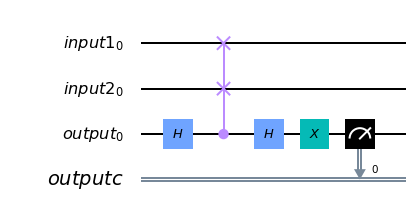

In [25]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)
qc.draw(output='mpl')        # draw the circuit

## <font color="blue">Qiskit</font>  CSWAP (Fredkin) Gate 

### CSwap Gate

> - **<font color="red">Reference</font>:** <a href="Basic Gates Provided by Qiskit.ipynb" target="_blank"><font color="blue">Basic Gates Provided by Qiskit</font></a> 

<BR>

<img style="float: left;" src="img/qgate-cswap.png">

> The quantum **Fredkin CSWAP** gate is a control gate operating on **<font color="red">three</font>** qubits. 
- If the state of the **first qubit** is **|1>** then the states of the **second and third qubits** are **swapped**, as in SWAP. 
- If it is **|0>**, nothing is changed. 
- Like the CCNOT, the CSWAP gate spans **three** wires. The top line is the **control qubit**.



### <font color="blue">Setup</font>

In [37]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ, BasicAer
import math

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

# Helper Funtion for Normalizing State Vectors
#
def normalize_state_Vector(state_vector):
    for result in state_vector:
        print("Normalized Result: " , round( np.abs(result)**2, 1) )

## Example CSWAP Circuit

# Set up the circuit (3 qubits)

qr1 = QuantumRegister(1, name='qr1')
qr2 = QuantumRegister(1, name='qr2')
qr3 = QuantumRegister(1, name='qr3')

# Setup 3 Classical Registers

cr1 = ClassicalRegister(1, name='cr1')
cr2 = ClassicalRegister(1, name='cr2')
cr3 = ClassicalRegister(1, name='cr3')

# Setup Quantum Circuit

qc = QuantumCircuit(qr1, qr2, qr3, cr1, cr2, cr3)

# write the value 0 to all three quantum registers to explicitly initialize
qc.reset(qr1) 
qc.reset(qr2) 
qc.reset(qr3) 


### <font color="blue">Construct the C_Swap Circuit - Set the Tracer bit</font>
### Initial Ket:
### |1<font color="red">10</font>> : Binary 6.

In [38]:
# Set the CONTROL qubit to 1 - this executes the C-SWAP mechanism.

qc.x(qr1)

# Apply NOT gate to transform 0 to a 1 for the data qubit, 
# this is the tracer bit that is tracked.

qc.x(qr2)

### <font color="blue">Construct the Execute of the C-SWAP</font>

In [39]:
## Execute the Swap
qc.cswap(qr1, qr2, qr3)

# Measure the Qubits
qc.measure(qr1, cr1)
qc.measure(qr2, cr2)
qc.measure(qr3, cr3)


### <font color="blue">Execute batch Job, get results.</font>

In [40]:
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend)
result = job.result()

### <font color="blue">Print Qstate, draw the circuit.</font>

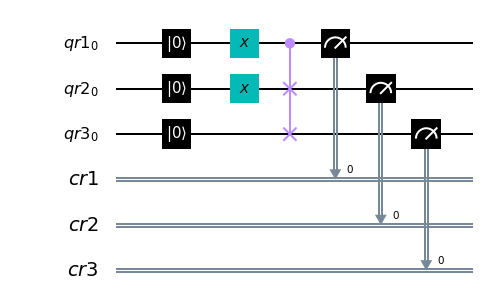

In [41]:
outputstate = result.get_statevector(qc, decimals=3)

# print(normalize_state_Vector(outputstate))

qc.draw(output='mpl')        # draw the circuit

### <font color="blue">Illustrate the Swap</font>

### <font color="red">Resulting</font> Ket:
### |1<font color="red">01</font>> : Binary 5.

In [36]:
counts = result.get_counts(qc)

for k in counts:
    binary_number = ''.join(reversed(k))
    print("*After C-Swap Gate*\n")
    print("Measurements C_Regs: => qr1, qr2, qr3: ", binary_number)
       

*After C-Swap Gate*

Measurements C_Regs: => qr1, qr2, qr3:  1 0 1


# <font color="red">Graded Exercises</font>  for use <font color="blue">with structured courses.</font>

## Experiment with the C-SWAP Circuit to Compare Quantum States

#### Goto the following link and read it carefully.

<BR>
    
> - https://bsiegelwax.medium.com/comparing-quantum-states-c6445e1e46fd

    
### Consider the following:

> **The SWAP Test is presented as a way to compare two quantum states**, but the literature I’ve seen hasn’t explained how you can quantify the difference. However, you can obtain more information from this experiment than a simple determination whether states are identical or not.

![Swap Test](img/SWAP_Test_QCEngine_Circuit.png "")

> The above circuit shows the standard SWAP Test. In this example, **the top two qubits are the ones you want to compare, and the bottom qubit is the one that you measure.** The cswap operation is a Fredkin (controlled-SWAP) gate with its control on the ancilla qubit (the one being measured).

> The way it works is that if you measure two identical qubits, like the two ground state qubits above, you will measure 0 with a probability of 1. **The more different the qubits are, the more that probability decreases**. 


> **<font color="red">However, the probability does not decrease at a 1-to-1 rate; instead, the difference is split evenly between 0 and 1 measurements. Therefore, you have 0 measurements representing <font color="blue">similarity</font>, and both 0 and 1 measurements representing <font color="blue">difference</font></font>**.


> What’s interesting is that **<font color="red">the SWAP Test is basis-agnostic</font>**. If we rotate both qubits to |+> and then rotate the second qubit pi/3 around the z axis, **the circuit works the same**.




## <font color="red">Reminder</Font> : Qubit / Bloch Sphere <font color="blue">Basis States</Font>


> **Mathematical Basis** is an important concept to be aware of and understand as it's central to Qubit manipulations.


There are **<font color="red">three</Font>** mathematical **basis elements** (aka. the **"endpoints" of the axis** to be "aware" of with the bloch sphere:
- **Computational (<font color="red">Z</font>) : <font color="blue">[0/1]</Font>**
- **Hadamard (<font color="red">X</font>): <font color="blue">[+/-]</Font>** 
- **Circular (<font color="red">Y</font>) : <font color="blue">[+i/-i]</Font>**

![vector-basis-space](img/vector-basis-space.png "")


> <font color="red">**NOTE**</font>: The basis elements are the **endpoints of an axis**. For **example**, the basis elements for the *computational basis* are **|0>** and **|1>**, which correspond to the endpoints of the **Z-axis**.

## <font color="Blue">Your Task:</font>

<BR>

The blog posing you were asked to read: 
> - https://bsiegelwax.medium.com/comparing-quantum-states-c6445e1e46fd

    
#### Indicates that:

> What’s interesting is that **<font color="red">the SWAP Test is basis-agnostic</font>**. If we rotate both qubits to **|+>** and then rotate the second qubit **pi/3** around the **z axis**, **the circuit works the same**.


#### And Postulates that:

Because the **SWAP Test is basis-agnostic**, one can switch between the various basis states:

- **Computational (<font color="red">Z</font>) : <font color="blue">[0/1]</Font>**
- **Hadamard (<font color="red">X</font>): <font color="blue">[+/-]</Font>** 
- **Circular (<font color="red">Y</font>) : <font color="blue">[+i/-i]</Font>**

> and **the circuit's behavior (Swap-Test) will still behave the same**.



Create the same Swap-Test Circuit in QUIRK and then **<font color="red">show the curcuit's consistent behavior</Font>** as you switch between each of the **THREE** basis States.

- Reminder: The TOP TWO Qubits are being tested for equality, **the third qubit will indicate ONE for equality and something other than ONE for non-equality**.


> The image of the QUIRK Circuit has been provided to you for inspiration, and is indicating equality of the top two qubits in the **computational basis states of ZERO**.

![Swap Test Basis States](img/Swap_Test_BasisStates.png "")

**<font color="red"> IMPORTANT</font>** - Copy the URL String into a new tab and do you work there, then when finished, copy the completed URL string to the proper cell below for evaluation and grading.


In [43]:
# QUIRK (Quantum Curcuit Simulator) 
from IPython.display import IFrame
IFrame(src='https://algassert.com/quirk', width=900, height=600)

## Basis State: **<font color="blue">Computational</Font> (<font color="red">Z</font>) : <font color="blue">[0/1]</Font>**
> Choose either <font color="blue">[0/1]</Font> for your example.

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~ro10%22]],%22gates%22:[{%22id%22:%22~ro10%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%223%20pi%20/%202%22}]]}}]}


#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>

## Basis State: **<font color="blue">Hadamard</Font> (<font color="red">X</font>) : <font color="blue">[+/-]</Font>**
> Choose either <font color="blue">[+/-]</Font> for your example.

### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~ro10%22]],%22gates%22:[{%22id%22:%22~ro10%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%223%20pi%20/%202%22}]]}}]}


#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>

## Basis State: **<font color="blue">Circular</Font> (<font color="red">X</font>) : <font color="blue">[+i/-i]</Font>**
> Choose either <font color="blue">[+i/-i]</Font> for your example.


### Copy your completed QUIRK URL string in the cell below.

It'll be of the following form: 

https://algassert.com/quirk#circuit={%22cols%22:[[%22~ro10%22]],%22gates%22:[{%22id%22:%22~ro10%22,%22name%22:%22Puzzle-#2%22,%22circuit%22:{%22cols%22:[[%22H%22],[{%22id%22:%22Rzft%22,%22arg%22:%223%20pi%20/%202%22}]]}}]}


#### Your COMPLETED QUIRK URL String Goes under here:


<BR><BR><BR>

![the-end](img/the-end.png "the-end")